In [1]:
import sqlite3
import time
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [22]:
ROW_COUNT = [100, 1000, int(1e4), int(1e5), int(1e6)] #, int(1e7)]

In [23]:
insert_times = []
find_times = []

for i in tqdm(ROW_COUNT):
    conn = sqlite3.connect('goodol-tick_data_{}.db'.format(i))
    c = conn.cursor()
    c.execute('''CREATE TABLE stocks{}
             (date text, trans text, 'symbol text', qty real, price real)'''.format(i))
    purchases = [('2006-03-28', 'BUY', 'IBM', 1000, i+45),
             ('2006-04-05', 'BUY', 'MSFT', 1000, i+72.00),
             ('2006-04-06', 'SELL', 'IBM', 500, i+53.00),
            ] * i
    
    start = time.time()
    c.executemany('INSERT INTO stocks{} VALUES (?,?,?,?,?)'.format(i), purchases)
    end = time.time()
    insert_times.append(end-start)
    start1 = time.time()
    a = list(c.execute('SELECT * FROM stocks{}'.format(i)))
    end1 = time.time()
    find_times.append(end1-start1)

100%|██████████| 5/5 [00:26<00:00,  7.57s/it]


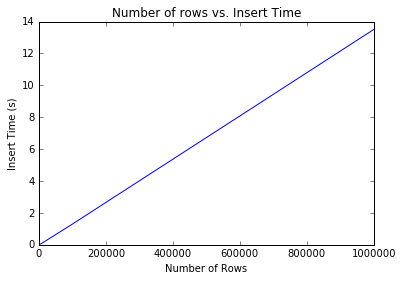

In [24]:
plt.plot(ROW_COUNT, insert_times)
plt.title('Number of rows vs. Insert Time')
plt.xlabel('Number of Rows')
plt.ylabel('Insert Time (s)')

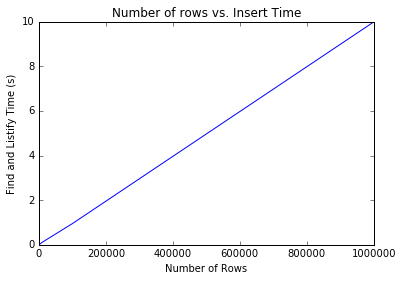

In [25]:
plt.plot(ROW_COUNT, find_times)
plt.title('Number of rows vs. Insert Time')
plt.xlabel('Number of Rows')
plt.ylabel('Find and Listify Time (s)')

# Varying column count

In [32]:
def qmark_factory(count):
    qstr = '('
    for i in range(count-1):
        qstr += '?,'
    qstr += '?)'
    return qstr

In [33]:
cols = {}
for i in range(100):
    cols['data{}'.format(i)] = i
insert_times = []
find_times = []
k = tuple(cols.keys())
for j in tqdm(ROW_COUNT):
    conn = sqlite3.connect('goodol-tick_data_{}.db'.format(j))
    c = conn.cursor()
    c.execute('''CREATE TABLE data_cols
                 {}'''.format(k))
    _ins_list = []
    for i in range(j):
        a = np.random.randn(100)
        _ins_list.append(tuple(a))
    s = qmark_factory(100)
    _ins_str = 'INSERT INTO data_cols VALUES {}'.format(s)
    ins_start = time.time()
    c.executemany(_ins_str, _ins_list)
    ins_end = time.time()
    insert_times.append(ins_end-ins_start)
    
    find_start = time.time()
    a = list(c.execute('SELECT * FROM data_cols'))
    find_end = time.time()
    find_times.append(find_end-find_start)

100%|██████████| 5/5 [04:46<00:00, 83.39s/it]


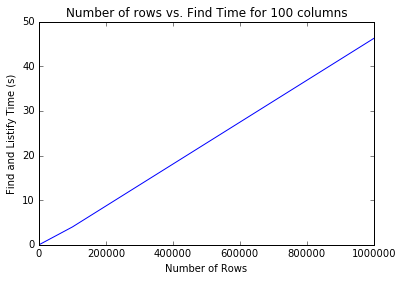

In [35]:
plt.plot(ROW_COUNT, find_times)
plt.title('Number of rows vs. Find Time for 100 columns')
plt.xlabel('Number of Rows')
plt.ylabel('Find and Listify Time (s)')

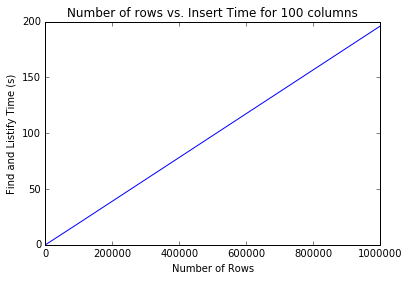

In [36]:
plt.plot(ROW_COUNT, insert_times)
plt.title('Number of rows vs. Insert Time for 100 columns')
plt.xlabel('Number of Rows')
plt.ylabel('Find and Listify Time (s)')